In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [16]:
# 从Numpy array构建数据管道

from sklearn.datasets import load_iris
iris  = load_iris()
features, labels  = iris.data, iris.target
print(feature.shape, label.shape)

ds1 = tf.data.Dataset.from_tensor_slices((features,labels))
for feature, label in ds1.take(3):
    print(feature,label)

(4,) ()
tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


In [21]:
# 从 Pandas DataFrame构建数据管道

iris_df = pd.DataFrame(features,columns=iris.feature_names)
print(iris_df.head())
print()
ds2 = tf.data.Dataset.from_tensor_slices((iris_df.to_dict('list'),labels))
for feature, label in ds2.take(3):
    print(feature,label)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

{'sepal length (cm)': <tf.Tensor: id=144, shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: id=145, shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: id=142, shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: id=143, shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: id=149, shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: id=150, shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: id=147,

In [41]:
# 从Python generator构建数据管道

image_scale = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
image_gen = image_scale.flow_from_directory("./data/cifar2/test/",
                                            target_size=(32, 32),
                                            batch_size=20,
                                             class_mode='binary')
image ,label = image_gen.next()

classdict = {v:k for k,v in image_gen.class_indices.items()}
print(image.shape, label.shape)

Found 2000 images belonging to 2 classes.
(20, 32, 32, 3) (20,)


In [42]:
def gen():
    for feat, label in image_gen:
        yield feat, label

ds3 = tf.data.Dataset.from_generator(gen,output_types=(tf.float32,tf.int32))


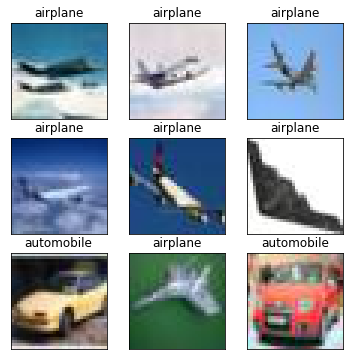

In [43]:

plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title(classdict[int(label)])
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

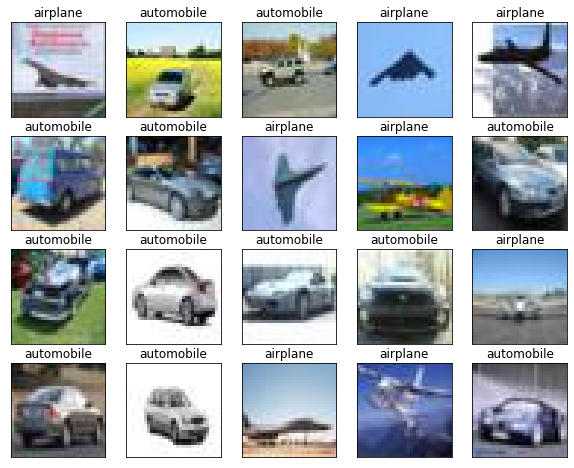

In [44]:
plt.figure(figsize=(10,8)) 
for pics ,labels in ds3.take(1):
    for i,(img,label) in enumerate(zip(pics,labels)):
        ax=plt.subplot(4,5,i+1)
        ax.imshow(img.numpy())
        ax.set_title(classdict[int(label)])
        ax.set_xticks([])
        ax.set_yticks([]) 
plt.show()

In [46]:
# 从csv文件构建数据管道
ds4 = tf.data.experimental.make_csv_dataset(
        file_pattern = ["./data/titanic/train.csv","./data/titanic/test.csv"],
        batch_size = 3,
        label_name = 'Survived',
     na_value="",
      num_epochs=1,
      ignore_errors=True)
for data,label in ds4.take(2):
    tf.print(data,label)

OrderedDict([('PassengerId', [45 0 14]),
             ('Pclass', ["" "" ""]),
             ('Name', ["S" "Q" "C"]),
             ('Sex', [13.5 7.75 30.0708]),
             ('Age', ["Kelly, Mrs. Florence \"Fannie\"" "Morrow, Mr. Thomas Rowan" "Nasser, Mrs. Nicholas (Adele Achem)"]),
             ('SibSp', [0 0 0]),
             ('Parch', [707 561 10]),
             ('Ticket', [2 3 2]),
             ('Fare', ["female" "male" "female"]),
             ('Cabin', [0 0 1]),
             ('Embarked', ["223596" "372622" "237736"])]) [1 0 1]
OrderedDict([('PassengerId', [0 40.5 23]),
             ('Pclass', ["" "" ""]),
             ('Name', ["Q" "S" "C"]),
             ('Sex', [7.75 14.5 15.0458]),
             ('Age', ["Jermyn, Miss. Annie" "van Billiard, Mr. Austin Blyler" "Richard, Mr. Emile"]),
             ('SibSp', [0 2 0]),
             ('Parch', [369 154 136]),
             ('Ticket', [3 3 2]),
             ('Fare', ["female" "male" "male"]),
             ('Cabin', [0 0 0]),
           

In [53]:
# 从文本文件构建数据管道
ds5 = tf.data.TextLineDataset(filenames = ["./data/titanic/train.csv","./data/titanic/test.csv"]
                         ).skip(1)
for data in ds5.take(5):
    tf.print(data)

493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S
192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S


In [68]:
#6,从文件路径构建数据管道
ds6 = tf.data.Dataset.list_files("data/cifar2/train/*/*.jpg")
for file in ds6.take(5):
    print(file)

tf.Tensor(b'data/cifar2/train/airplane/3565.jpg', shape=(), dtype=string)
tf.Tensor(b'data/cifar2/train/airplane/1411.jpg', shape=(), dtype=string)
tf.Tensor(b'data/cifar2/train/automobile/337.jpg', shape=(), dtype=string)
tf.Tensor(b'data/cifar2/train/airplane/1858.jpg', shape=(), dtype=string)
tf.Tensor(b'data/cifar2/train/airplane/3081.jpg', shape=(), dtype=string)


In [69]:
def load_img(img_path):
    label = tf.constant(1,tf.int8) if tf.strings.regex_full_match(
        img_path,'.*/automobile/.*') else tf.constant(0,tf.int8)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img,[28,28])/255.
    return img, label


In [70]:
ds6 = ds6.map(load_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)


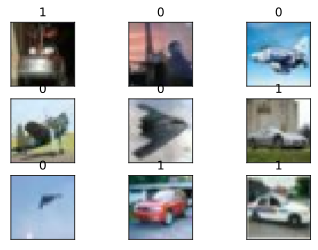

In [77]:

for i,(img,label) in enumerate(ds6.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title(label.numpy())
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

Dataset数据结构应用非常灵活，因为它本质上是一个Sequece序列，其每个元素可以是各种类型，例如可以是张量，列表，字典，也可以是Dataset。

Dataset包含了非常丰富的数据转换功能。

map: 将转换函数映射到数据集每一个元素。

flat_map: 将转换函数映射到数据集的每一个元素，并将嵌套的Dataset压平。

interleave: 效果类似flat_map,但可以将不同来源的数据夹在一起。

filter: 过滤掉某些元素。

zip: 将两个长度相同的Dataset横向铰合。

concatenate: 将两个Dataset纵向连接。

reduce: 执行归并操作。

batch : 构建批次，每次放一个批次。比原始数据增加一个维度。 其逆操作为unbatch。

padded_batch: 构建批次，类似batch, 但可以填充到相同的形状。

window :构建滑动窗口，返回Dataset of Dataset.

shuffle: 数据顺序洗牌。

repeat: 重复数据若干次，不带参数时，重复无数次。

shard: 采样，从某个位置开始隔固定距离采样一个元素。

take: 采样，从开始位置取前几个元素。